<a href="https://colab.research.google.com/github/soumyadiptapete/Coursera_TF_specialization/blob/master/Exercise_3_Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise 3
In the videos you looked at how you would improve Fashion MNIST using Convolutions. For your exercise see if you can improve MNIST to 99.8% accuracy or more using only a single convolutional layer and a single MaxPooling 2D. You should stop training once the accuracy goes above this amount. It should happen in less than 20 epochs, so it's ok to hard code the number of epochs for training, but your training must end once it hits the above metric. If it doesn't, then you'll need to redesign your layers.

I've started the code for you -- you need to finish it!

When 99.8% accuracy has been hit, you should print out the string "Reached 99.8% accuracy so cancelling training!"


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential,Model
from keras.layers import Dense, Activation,Flatten,Input,Conv2D,MaxPooling2D
from keras import regularizers

Using TensorFlow backend.


In [0]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.998):
      print("\nReached 99.8% accuracy so cancelling training!")
      self.model.stop_training = True

In [0]:
callbacks=myCallback()

In [0]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
x_train.shape

(60000, 28, 28, 1)

In [0]:
y_train=tf.keras.utils.to_categorical(y_train,num_classes=10)
y_test=tf.keras.utils.to_categorical(y_test,num_classes=10)
y_train.shape

(60000, 10)

In [0]:
inputs=Input(shape=(28,28,1))

In [0]:
X=Conv2D(32,(3,3),activation=tf.nn.relu)(inputs)

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
X=MaxPooling2D(2,2)(X)

In [0]:
X=Conv2D(32,(3,3),activation=tf.nn.relu)(X)

In [0]:
X=MaxPooling2D(2,2)(X)

In [0]:
X=Flatten()(X)

In [0]:
X=Dense(128,activation=tf.nn.relu)(X)

In [0]:
pred=Dense(10,activation=tf.nn.softmax)(X)

In [0]:
model=Model(inputs=inputs,outputs=pred)

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               102528    
__________

In [0]:
model.fit(x_train,y_train,epochs=20,callbacks=[callbacks])

Epoch 1/20
60000/60000 [==============================] - 8s 139us/step - loss: 0.0217 - acc: 0.9927
Epoch 2/20
60000/60000 [==============================] - 7s 122us/step - loss: 0.0166 - acc: 0.9946
Epoch 3/20
60000/60000 [==============================] - 7s 121us/step - loss: 0.0135 - acc: 0.9954
Epoch 4/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.0115 - acc: 0.9960
Epoch 5/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.0091 - acc: 0.9971
Epoch 6/20
60000/60000 [==============================] - 7s 121us/step - loss: 0.0083 - acc: 0.9972
Epoch 7/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.0067 - acc: 0.9979
Epoch 8/20
60000/60000 [==============================] - 7s 121us/step - loss: 0.0078 - acc: 0.9976
Epoch 9/20
60000/60000 [==============================] - 7s 121us/step - loss: 0.0060 - acc: 0.9981

Reached 99.8% accuracy so cancelling training!


In [0]:
model.evaluate(x_train,y_train)

60000/60000 [==============================] - 3s 55us/step


[0.008985815578017847, 0.9970166666666667]

[<tf.Tensor 'conv2d_1/Relu:0' shape=(?, 26, 26, 32) dtype=float32>, <tf.Tensor 'max_pooling2d_1/MaxPool:0' shape=(?, 13, 13, 32) dtype=float32>, <tf.Tensor 'conv2d_2/Relu:0' shape=(?, 11, 11, 32) dtype=float32>, <tf.Tensor 'max_pooling2d_2/MaxPool:0' shape=(?, 5, 5, 32) dtype=float32>, <tf.Tensor 'flatten_1/Reshape:0' shape=(?, ?) dtype=float32>, <tf.Tensor 'dense_1/Relu:0' shape=(?, 128) dtype=float32>, <tf.Tensor 'dense_2/Softmax:0' shape=(?, 10) dtype=float32>]
(1, 26, 26, 32)
(1, 13, 13, 32)
(1, 11, 11, 32)
(1, 5, 5, 32)


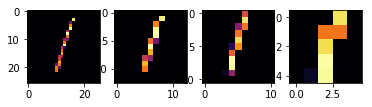

In [0]:
f,axarr=plt.subplots(1,4)
image_index=2
conv_number=10
layer_outputs = [layer.output for layer in model.layers][1:]
print(layer_outputs)
pred_model=Model(inputs=model.input,outputs=layer_outputs)
for i in range(0,4):
  f1=pred_model.predict(x_test[image_index].reshape(1,28,28,1))[i]
  print(f1.shape)
  
  axarr[i].imshow(f1[0,:,:,conv_number],cmap='inferno')

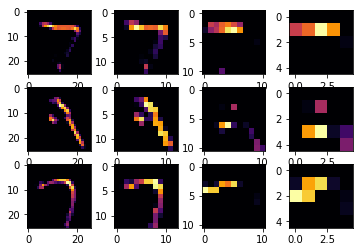

In [0]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in model.layers][1:]
activation_model = Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(x_test[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(x_test[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(x_test[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)